In [2]:
import time
import numpy as np
from IPython.display import display, Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import pandas as pd
from hmmlearn import hmm
import numpy as np
import seaborn as sns
from scipy.stats import norm
import itertools
import matplotlib.pyplot as plt
from hmmlearn.hmm import GMMHMM
from  sklearn.metrics import mean_squared_error as mse
from astropy.io import fits
import matplotlib.pyplot as plt
import os, sys



import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def plot_gp(mu, cov, X, X_train=None, Y_train=None, samples=[]):
    plt.figure(figsize=(30,10))
    X = X.ravel()
    mu = mu.ravel()
    uncertainty = 1.96 * np.sqrt(np.diag(cov))
    
    plt.fill_between(X, mu + uncertainty, mu - uncertainty, alpha=0.1)
    plt.plot(X, mu, label='Mean')
    for i, sample in enumerate(samples):
        plt.plot(X, sample, lw=1, ls='--', label=f'Sample {i+1}')
    if X_train is not None:
        plt.plot(X_train, Y_train, 'rx')
    plt.legend()

def plot_gp_2D(gx, gy, mu, X_train, Y_train, title, i):
    ax = plt.gcf().add_subplot(1, 2, i, projection='3d')
    ax.plot_surface(gx, gy, mu.reshape(gx.shape), cmap=cm.coolwarm, linewidth=0, alpha=0.2, antialiased=False)
    ax.scatter(X_train[:,0], X_train[:,1], Y_train, c=Y_train, cmap=cm.coolwarm)
    ax.set_title(title)

In [1]:
class_type = 'CANDIDATE'
folder_lc = "/work/work_teamEXOPLANET/KOI_LC/"
#Clean Light Curves
lc_kepler = np.load(folder_lc+"cleaned/LC_kepler_processed.npy" )   
lc_kepler_times = np.load('/work/work_teamEXOPLANET/KOI_LC/npy/KOI_LC_time.npy')

NameError: name 'np' is not defined

In [4]:
#borrar nans... arreglo variable
X_lc = []
X_time = []
for i in range(lc_kepler_times.shape[0]):
    mask_nan_aux = np.isnan(lc_kepler[i])
    X_lc.append(lc_kepler[i][~mask_nan_aux])
    X_time.append(lc_kepler_times[i][~mask_nan_aux])
    
X_lc = np.asarray(X_lc)
X_time = np.asarray(X_time)

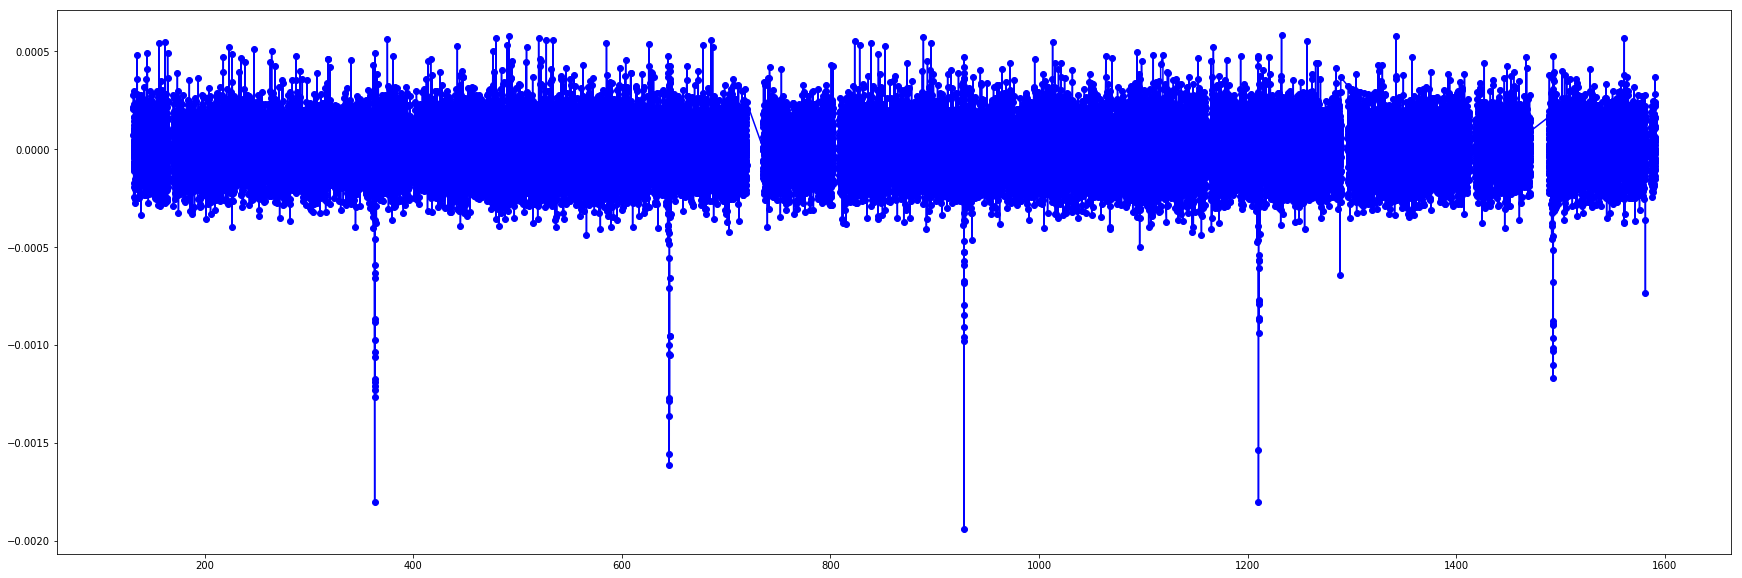

In [5]:
import matplotlib.pyplot as plt

indice = 8043

plt.figure(figsize=(30,10))
plt.plot(X_time[indice],X_lc[indice],'bo-')
plt.show()

In [6]:
X_lc

array([array([-3.34071740e-04, -9.56036533e-04, -3.20341756e-04, ...,
        9.60861553e-05, -4.28106840e-03, -1.24094493e-04]),
       array([ 6.36055315e-04, -7.12035189e-05,  1.42407038e-04, ...,
        2.43145845e-04,  5.07318850e-04,  7.28473887e-04]),
       array([-0.0031464 , -0.00269286, -0.00229979, ..., -0.00050922,
       -0.00062848, -0.00048215]),
       ...,
       array([-0.00042695,  0.00067268, -0.00050603, ...,  0.00011799,
        0.00056118, -0.00088241]),
       array([-0.00037845,  0.00071743, -0.00046499, ...,  0.00012759,
        0.00057178, -0.0008709 ]),
       array([-1.71322380e-05, -1.38334626e-04,  8.02269873e-04, ...,
        4.07656344e-04, -1.24859904e-03, -4.05257242e-04])], dtype=object)

In [7]:
import lightkurve as lk
lc = lk.LightCurve(time=range(1001, 1012), flux=[0.5, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 0.5])
folded_lc = lc.fold(period=5., t0=1006.)
#folded_lc   

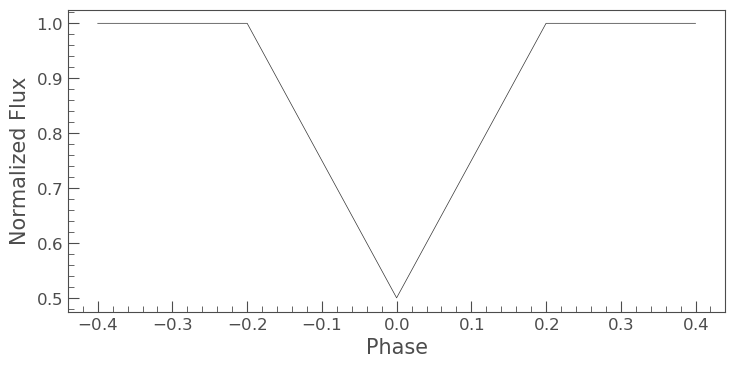

In [8]:
folded_lc.plot()

In [9]:
import pandas as pd
folder = "../../KOI_Data/"
df_meta = pd.read_csv(folder+"/koi_metadata.csv")
df_meta

,KOI Name,NExScI Disposition,Kepler Name,Period,Time of Transit Epoch,First Transit Time (BJD),Impact Parameter,Duration,Transit Depth,r/R,...,Teff,log(g),Metallicity,Stellar Radius,Stellar Mass,Max single event sigma,Max Multievent sigma,Transit Model SNR,KOI count,Transit Number
0,K00889.01,CONFIRMED,Kepler-75 b,8.884923,169.991686,2455002.992,0.069,2.07004,16053.4,0.114,...,5332.0,4.500,-0.08,0.843,0.821,61.291,474.021,388.2,1,153
1,K01009.01,FALSE POSITIVE,NaN,5.092465,357.535940,2455190.536,0.161,3.65900,254.0,0.014,...,5037.0,4.547,-0.20,0.751,0.727,3.648,15.175,17.1,1,225
2,K07621.01,FALSE POSITIVE,NaN,275.073650,315.248600,2455148.249,0.595,3.37000,228.9,0.014,...,5604.0,4.226,-0.12,1.187,0.864,5.909,8.012,7.5,1,4
3,K06252.01,FALSE POSITIVE,NaN,8.460439,133.774490,2454966.774,1.061,4.73492,76412.9,0.478,...,5951.0,4.638,-1.06,0.702,0.796,452.526,3704.503,1797.4,1,164
4,K00958.01,CANDIDATE,NaN,21.761298,166.540438,2454999.540,0.123,1.24300,1300.7,0.032,...,4859.0,4.612,0.00,0.720,0.781,19.204,96.205,60.0,1,62
5,K00984.01,CANDIDATE,NaN,4.287467,262.062450,2455095.062,0.374,1.56930,790.1,0.026,...,5296.0,4.576,0.12,0.815,0.911,19.840,116.715,19.4,1,313
6,K04162.01,FALSE POSITIVE,NaN,0.539366,131.974570,2454964.975,0.988,5.43400,145.0,0.016,...,6341.0,3.301,-0.10,5.302,2.050,4.847,9.076,57.6,1,1239
7,K07622.01,FALSE POSITIVE,NaN,36.267167,155.081300,2454988.081,0.214,2.06500,627.1,0.022,...,4264.0,4.637,-0.20,0.620,0.607,3.016,7.472,10.0,1,39
8,K00994.01,CANDIDATE,NaN,4.298920,132.861870,2454965.862,0.972,2.74700,237.6,0.020,...,5300.0,4.385,0.18,0.986,0.861,3.986,15.994,20.0,1,314
9,K00998.01,FALSE POSITIVE,NaN,161.788327,214.039000,2455047.039,0.267,5.31000,87750.0,0.273,...,6018.0,4.327,0.18,1.212,1.142,341.666,806.993,704.5,1,9


In [10]:
indice = 8043
import lightkurve as lk
lc = lk.LightCurve(time=X_time[indice], flux=1+X_lc[indice])
folded_lc = lc.fold(period=282.525356, t0=363.071925)
#folded_lc   

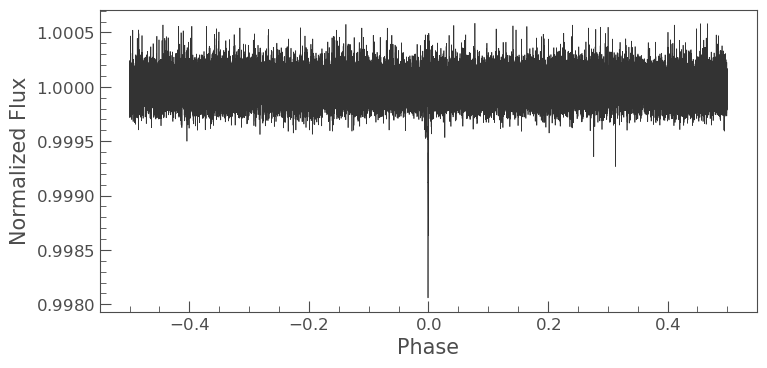

In [11]:
folded_lc.plot()

In [12]:
normalized_lc = lc.normalize()
folded_lc = normalized_lc.fold(period=282.525356, t0=363.071925)
#folded_lc   

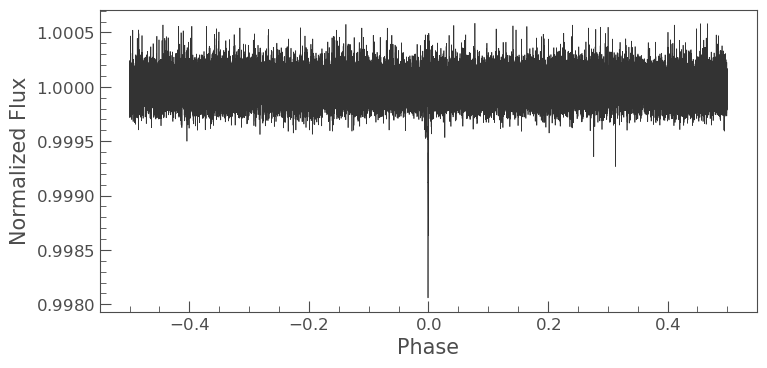

In [13]:
folded_lc.plot()

In [14]:
import lightkurve as lk
period_list = df_meta['Period']
t0_list = df_meta['Time of Transit Epoch']

indice = 8043
import lightkurve as lk
lc = lk.LightCurve(time=X_time[indice], flux=1+X_lc[indice])
folded_lc = lc.fold(period=282.525356, t0=363.071925)



In [15]:
print(folded_lc.phase)
print(folded_lc.flux)

[-0.49999875 -0.49997251 -0.49994022 ...  0.49995517  0.49998745
  0.49999818]
[0.99997519 1.00023442 1.         ... 0.99993679 0.9999871  1.00000156]


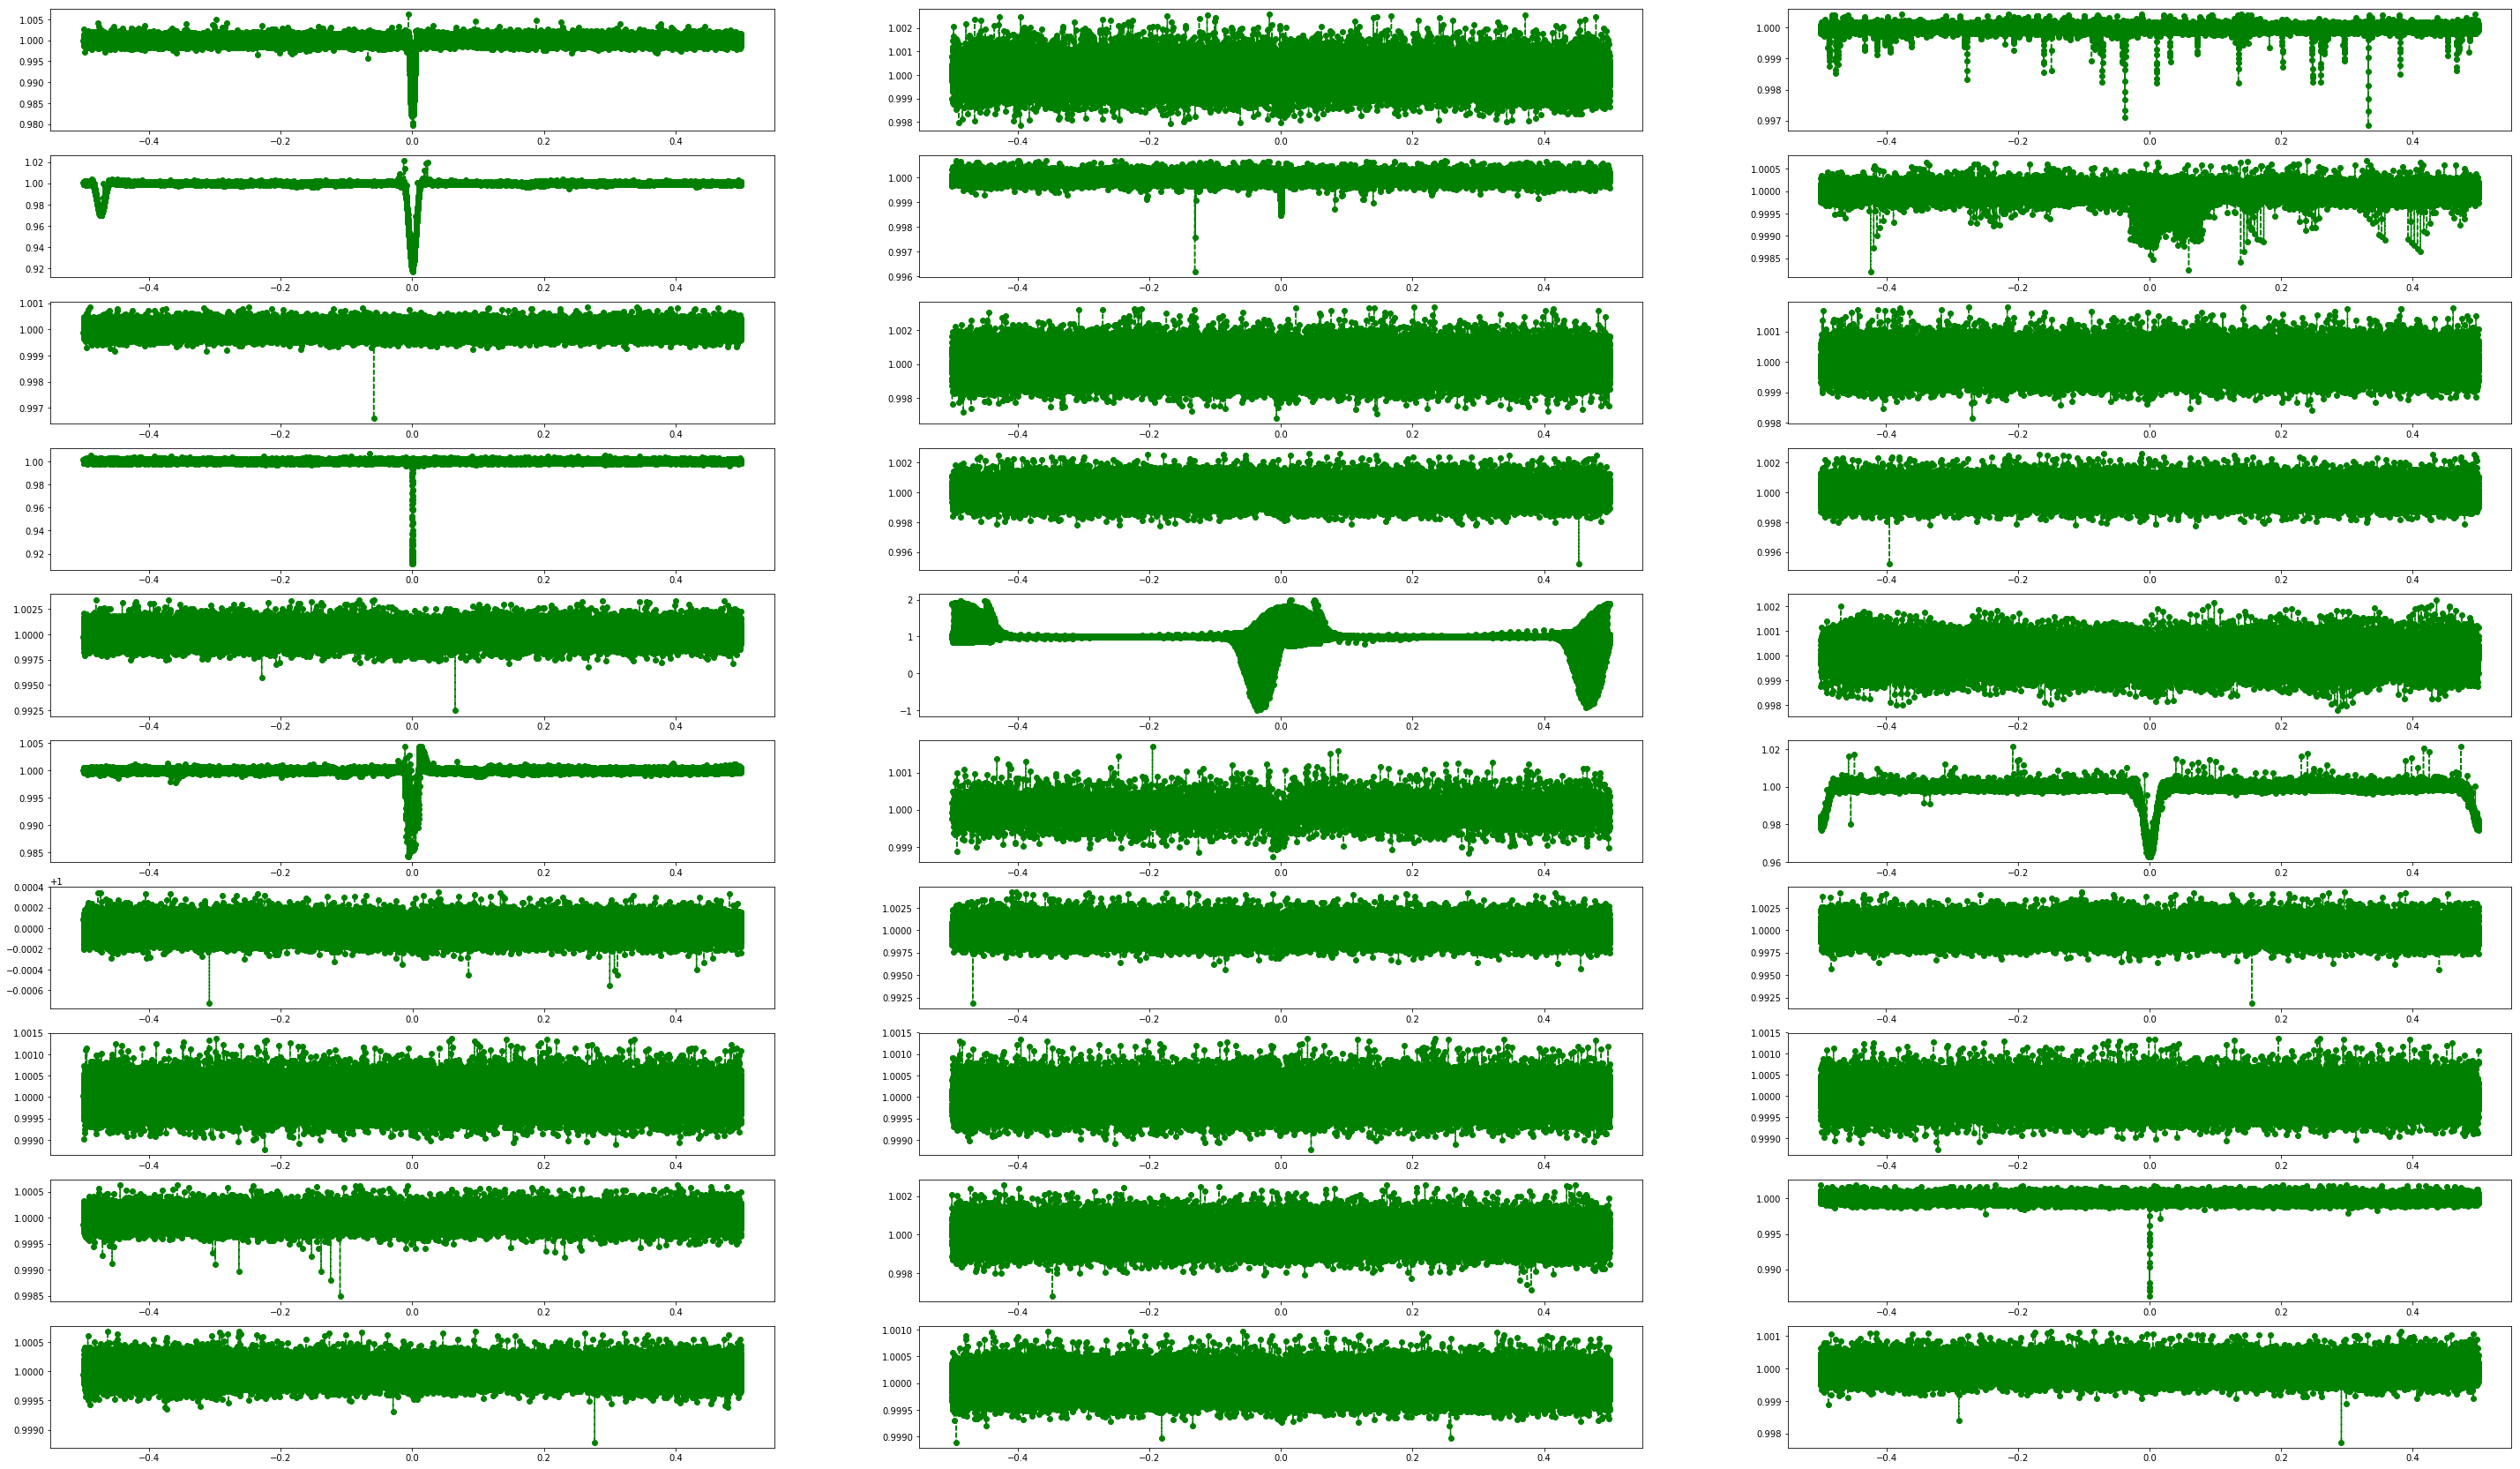

In [25]:
rr = list(np.linspace(0,8000,30,dtype='int'))
for i in range(len(rr)):
    # VISUALIZATION ---------------
    plt.subplot(10,3,i+1)
    lc = lk.LightCurve(time=X_time[i], flux=1+X_lc[i])
    folded_lc = lc.fold(period=period_list[i], t0=t0_list[i])
    
    imgplot1=plt.plot(folded_lc.phase,folded_lc.flux,'go--')
    plt.gcf().set_size_inches((50,30))